In [1]:
# Import the libraries/files we want to run
import os
import tensorflow
import tensorflow.keras as keras

# local files (stuff we wrote)
import DataProcessing
import ProjectMap
import BaseModel
from scripts.DataProcessing import getEdgesFromGreenness


2025-07-10 17:50:18.286451: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 17:50:18.294448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752184218.302283   25855 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752184218.305702   25855 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752184218.312553   25855 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Get the directory layout of the project
PROJECT_MAP= ProjectMap.ProjectMap()
print(PROJECT_MAP)

Root: /mnt/c/Users/codyr/Code/AI-570/Final_Project/AI570_DeepLearning_Project
Scripts: /mnt/c/Users/codyr/Code/AI-570/Final_Project/AI570_DeepLearning_Project/scripts
Data: /mnt/c/Users/codyr/Code/AI-570/Final_Project/AI570_DeepLearning_Project/data


In [3]:
# Load the data
# Odds are this is not how we will actually handle the data, it's just easy to do this for the base model

data_path= os.path.join(PROJECT_MAP.dataDirectory, "base_model_data")
data= DataProcessing.loadDataset(data_path)
classes= data.class_names


Found 4494 files belonging to 3 classes.


I0000 00:00:1752183101.525186   19795 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
# Working with the base model, not meant to be good, just a starting point
# Will probably be removed later

base_model= BaseModel.BaseModel()

# convolutional layer
convolutional= keras.layers.Conv2D(
    8, (3,3),
    activation="relu",
    input_shape=(128,128,3)
)

layers = [
    keras.layers.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(len(classes), activation="softmax")
]

base_model.buildModel(layers)
base_model.compileModel()
training_results= base_model.trainModel(data) 


/home/codyrgould/tf-gpu/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model built
Model compiled
Epoch 1/5


I0000 00:00:1752183102.671059   20018 service.cc:152] XLA service 0x7fe19401b220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752183102.671078   20018 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-07-10 17:31:42.683832: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752183102.764827   20018 cuda_dnn.cc:529] Loaded cuDNN version 90300


 22/141 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5581 - loss: 367.4766

I0000 00:00:1752183103.968362   20018 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8614 - loss: 121.5722
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8469 - loss: 10.6489
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7960 - loss: 59.9606
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7576 - loss: 55.4403
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8276 - loss: 8.8631


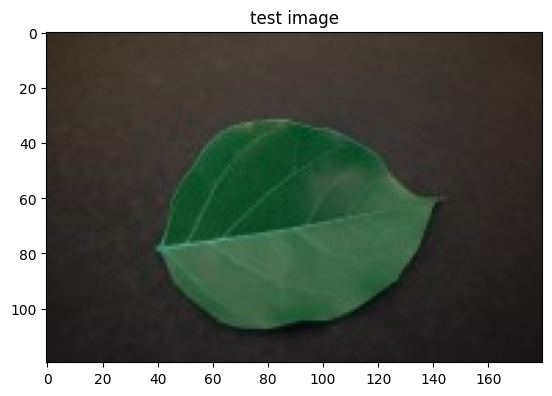

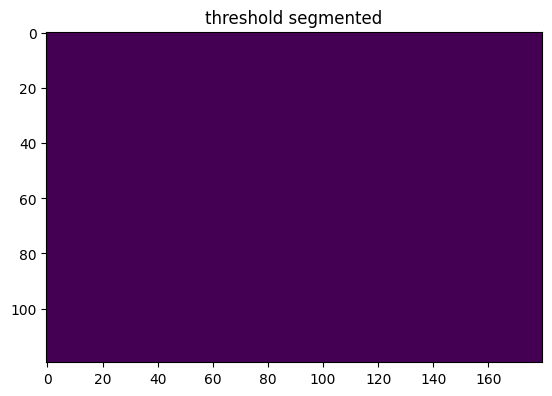

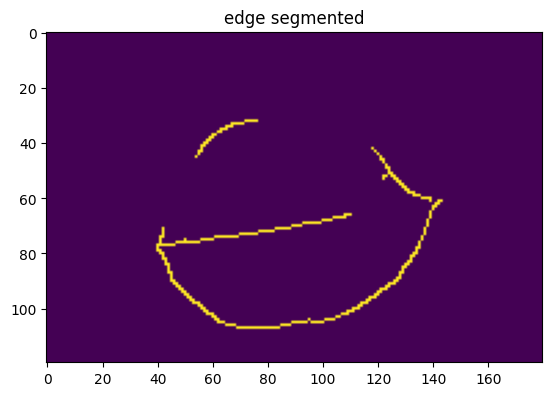

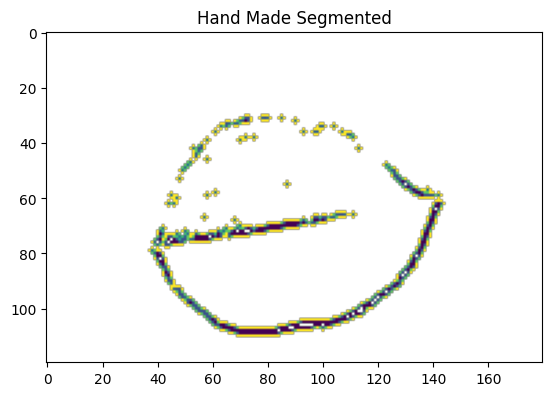

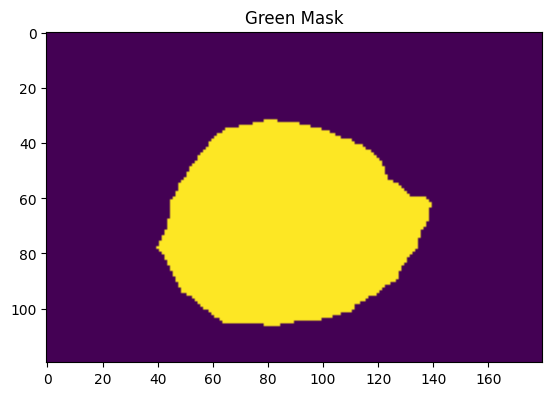

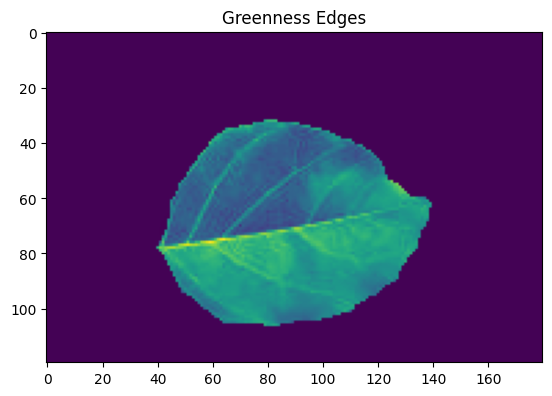

In [3]:
# Testing some of the segmentation code
# Will be removed later

test_image_path= os.path.join(PROJECT_MAP.dataDirectory, 'test.jpg')

test_image= DataProcessing.loadImage(test_image_path)
DataProcessing.displayImage(test_image, "test image")

segmented= DataProcessing.thresholdSegmentation(test_image, 150)
DataProcessing.displayImage(segmented, "threshold segmented")

edge_segmented= DataProcessing.edgeSegmentation(test_image, threshold=50)
DataProcessing.displayImage(edge_segmented, "edge segmented")

h_segmented= DataProcessing.handMadeSegmentation(test_image, 110)
DataProcessing.displayImage(h_segmented, "Hand Made Segmented")

#shows what mask output looks like
green_mask= DataProcessing.getGreennessMask(test_image)
DataProcessing.displayImage(green_mask, "Green Mask")

#shows what edges with CLAHE after greenness mask will look like
greenness_edges = getEdgesFromGreenness(test_image)
DataProcessing.displayImage(greenness_edges, "Greenness Edges")
